In [1]:
#imports 
from qiskit import *
from qiskit.tools.visualization import plot_bloch_multivector
from numpy import linalg as LA
import numpy as np
from qiskit.providers.aer import noise
from numpy import random

#for snapshots
from qiskit.extensions.simulator import snapshot

#for custom gates
from qiskit.transpiler.passes import Decompose
from qiskit.circuit import Gate
#from qiskit.transpiler import PassManager, transpile

%matplotlib inline

In [2]:
#initialize state vector
def normalize(vector):
    return vector / LA.norm(vector)

def initialize( vector ):
    vector = normalize(vector)
    qc.initialize(vector.tolist(),0)



In [3]:
def Encode(qc):
    sub_q = QuantumRegister(9)
    encode = QuantumCircuit(sub_q, name='encode')
    encode.cx(0,3)
    encode.cx(0,6)
    encode.h(0)
    encode.h(3)
    encode.h(6)
    encode.cx(0,1)
    encode.cx(0,2)
    encode.cx(3,4)
    encode.cx(3,5)
    encode.cx(6,7)
    encode.cx(6,8)
    encode.draw(output = 'mpl')
    sub_inst = encode.to_instruction()
    qc.append(sub_inst, [0,1,2,3,4,5,6,7,8])

In [4]:
def error(error_bitflip,error_phaseflip,qc):
    for i in range(9):
        if(random.random() < error_bitflip):
            qc.x(i)
    qc.barrier()
    for i in range(9):
        if(random.random() < error_phaseflip):
            qc.z(i)
    qc.barrier()

In [5]:
def bit_flip_correct(qc):
    correct = QuantumCircuit(3, name='bit_flip_correct')
    correct.cx(0,2)
    correct.cx(0,1)
    correct.ccx(2,1,0)
    sub_inst = correct.to_instruction()
    
    '----------- correct bit flip in 1st block [0,1,2] using repitition code ------------------'
    
    qc.barrier()
    qc.append(sub_inst,[0,1,2])
    qc.barrier()
    
    '----------- correct bit flip in 2nd block [3,4,5] using repitition code -------------------'
    
    qc.barrier()
    qc.append(sub_inst,[3,4,5])
    qc.barrier()
   
    '----------- correct bit flip in 2nd block [3,4,5] using repitition code -------------------'
    
    
    qc.barrier()
    qc.append(sub_inst,[6,7,8])
    qc.barrier()
       
   

In [12]:
def phase_flip_correct(qc):
    correct = QuantumCircuit(9, name='phase_flip_correct')
    for i in [0,3,6]:
        correct.h(i)
    correct.cx(0,3)
    correct.cx(0,6)
    correct.ccx(6,3,0)
    sub_inst = correct.to_instruction()
    
    qc.barrier()
    qc.append(sub_inst,[0,1,2,3,4,5,6,7,8])
    qc.barrier()
   
    

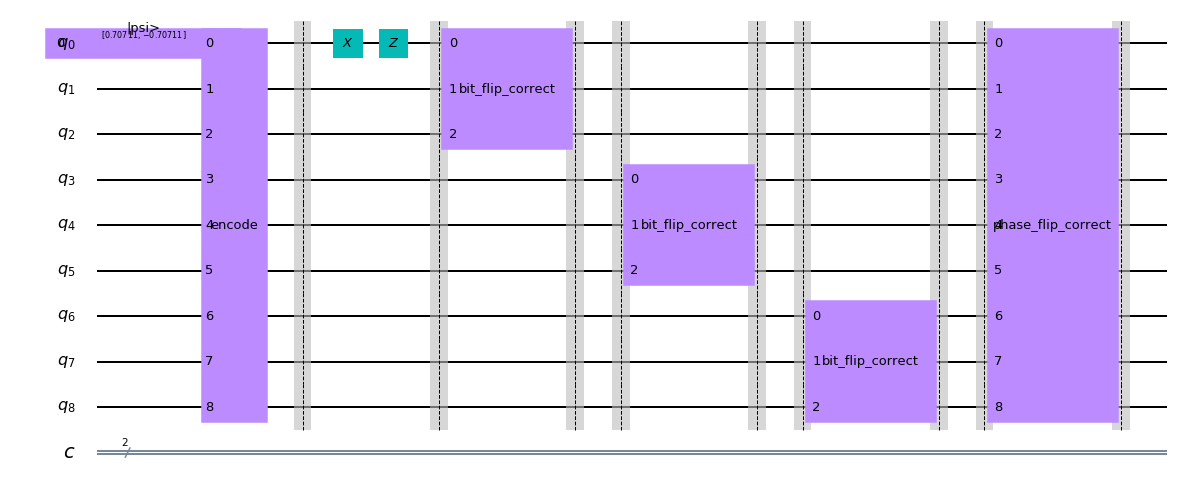

In [41]:
qc = QuantumCircuit(9,2)
initialize([1,-1])
Encode(qc)
qc.barrier()
#error(0.1,0.1,qc)
qc.x(0)
qc.z(0)
bit_flip_correct(qc)
phase_flip_correct(qc)
qc.draw(output = 'mpl')


In [42]:
'---------------------------------- simulation -------------------------------------------------'
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc,simulator).result()
statevector = result.get_statevector()

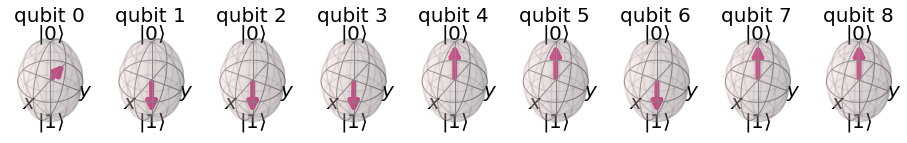

In [43]:
plot_bloch_multivector(statevector)
#first qubit is the data qubit